Link archive : https://drive.google.com/file/d/1HGDp7CJtugifk_qWTNgILLiXsz8rjoKQ/view?usp=sharing

### Project description : <br>
The datasets contain data on the use of the virtual telephony service CallMeMaybe. Its clients are organizations that need to distribute large numbers of incoming calls among various operators, or make outgoing calls through their operators. Operators can also make internal calls to communicate with one another. These calls go through CallMeMaybe's network.

### Task : <br>
Determinate ineffective operators by finding the probability that an operator is missing a large number of incoming calls, has a long waiting time for incoming calls and a small number of outgoing calls.

### Task decomposed :<br>
####    * Data preprocessing :
        * Study missing values ;
        * Study data type ;
####    * Exploratory data analysis :
        * Analyse the number of calls per day based on call direction, look at the average number and decide which number should be considered too small for the sample . Plot a histogram and describe the results.
        * Study the share of internal and external calls for each day and describe the findings. Plot a pie chart.
        * Study the call length for incoming calls for those with waiting time and without waiting time. Compare the results. Plot a histogram for each of them.
        * Calculate the number of missing calls per day for each operator. Plot a histogram.
        * Determinate ineffective operators.
####     * Test the hypotheses :
        * Incoming calls have a larger number of missing calls than outcoming calls ;
        * Users with A tariff plan have a longer waiting time for incoming calls than average ; 
        * Users with C tariff plan have a smaller number of outgoing calls than users with B tariff plan ;
####     * Conclusion ;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")


In [2]:
dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')
clients = pd.read_csv('/datasets/telecom_clients_us.csv')

In [3]:
dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [4]:
clients

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null object
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null float64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


#### Study the missing values

In [7]:
dataset.isnull().count()

user_id                53902
date                   53902
direction              53902
internal               53902
operator_id            53902
is_missed_call         53902
calls_count            53902
call_duration          53902
total_call_duration    53902
dtype: int64

In [8]:
clients.isnull().count()

user_id        732
tariff_plan    732
date_start     732
dtype: int64

In [9]:
dataset.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [10]:
dataset[dataset['internal'].isnull() & dataset['operator_id'].isnull()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1007,166405,2019-09-18 00:00:00+03:00,in,NaN,NaN,True,1,0,59
1090,166405,2019-10-01 00:00:00+03:00,in,NaN,NaN,True,1,0,1
1864,166406,2019-08-20 00:00:00+03:00,in,NaN,NaN,True,1,0,36
7523,166604,2019-10-31 00:00:00+03:00,in,NaN,NaN,True,1,0,5
15046,166884,2019-08-30 00:00:00+03:00,in,NaN,NaN,True,36,0,4
15055,166884,2019-09-02 00:00:00+03:00,in,NaN,NaN,True,7,0,2
15093,166884,2019-09-17 00:00:00+03:00,in,NaN,NaN,True,21,0,9
15136,166884,2019-10-16 00:00:00+03:00,in,NaN,NaN,True,15,0,10
20904,167011,2019-09-13 00:00:00+03:00,in,NaN,NaN,True,1,0,7
21004,167016,2019-10-23 00:00:00+03:00,out,NaN,NaN,True,3,0,196


In [11]:
dataset.dropna(subset = ['internal'])

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


There are not so many missing values in 'internal' column and there is no relationship with other columns so I thought that deleting the rows containing those missing values won't affect the results.

In [12]:
dataset['operator_id']=dataset['operator_id'].fillna(0)

In [13]:
dataset.isnull().sum()
dataset['operator_id']

0             0.0
1        880022.0
2        880020.0
3        880020.0
4        880022.0
           ...   
53897    957922.0
53898    957922.0
53899    957922.0
53900    957922.0
53901         0.0
Name: operator_id, Length: 53902, dtype: float64

Also no relationship between the missing values from 'operator_id' column and the rest of the columns. But since there are more missing values,deleting the rows is not an option because it could affect the results so I just filled the missing values with 0.  

In [14]:
dataset[dataset.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,0.0,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,0.0,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562
53875,168601,2019-11-26 00:00:00+03:00,in,False,0.0,True,3,0,35
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89


In [15]:
dataset = dataset.drop_duplicates()

In [16]:
#dataset[dataset.duplicated()]
dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,0.0,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [17]:
dataset[dataset['calls_count'] > 300] 

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1078,166405,2019-09-30 00:00:00+03:00,in,False,0.0,True,598,0,352
1085,166405,2019-10-01 00:00:00+03:00,in,False,0.0,True,714,0,467
1094,166405,2019-10-02 00:00:00+03:00,in,False,0.0,True,357,0,3940
6579,166582,2019-08-13 00:00:00+03:00,out,False,885890.0,False,308,35126,40739
6599,166582,2019-08-15 00:00:00+03:00,out,False,885890.0,False,417,42258,49942
...,...,...,...,...,...,...,...,...,...
52950,168361,2019-11-23 00:00:00+03:00,in,False,0.0,True,409,0,843
53034,168361,2019-11-25 00:00:00+03:00,in,False,0.0,True,465,0,1012
53042,168361,2019-11-26 00:00:00+03:00,in,False,0.0,True,604,0,1331
53083,168361,2019-11-27 00:00:00+03:00,in,False,0.0,True,698,0,1500


In [18]:
dataset= dataset[dataset['calls_count'] < 300]
dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,0.0,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [19]:
dataset['call_duration'].value_counts()

0       20999
1         184
7         124
8         114
15        114
        ...  
2252        1
6318        1
4239        1
3547        1
2938        1
Name: call_duration, Length: 5243, dtype: int64

In [20]:
dataset[dataset['call_duration']>500].groupby(['date','operator_id']).sum()

user_id  is_missed_call  calls_count  \
date                      operator_id                                         
2019-08-03 00:00:00+03:00 879898.0      166406           False           14   
2019-08-05 00:00:00+03:00 879896.0      166406           False           25   
                          879898.0      166406           False          103   
2019-08-06 00:00:00+03:00 879896.0      332812           False           41   
                          879898.0      166406           False           82   
...                                        ...             ...          ...   
2019-11-28 00:00:00+03:00 970242.0      168225           False            3   
                          971102.0      168054           False           27   
                          972410.0      166680           False           26   
                          972412.0      166680           False           23   
                          972460.0      166940           False           18   

                                       call_duration  total_call_duration  
date                      operator_id                                      
2019-08-03 00:00:00+03:00 879898.0               898                 1048  
2019-08-05 00:00:00+03:00 879896.0              1785                 1998  
                          879898.0              5445                 6198  
2019-08-06 00:00:00+03:00 879896.0              4925                 5334  
                          879898.0              4910                 5441  
...                                              ...                  ...  
2019-11-28 00:00:00+03:00 970242.0              1106                 1146  
                          971102.0              2980                 3437  
                          972410.0              2283                 2552  
                          972412.0              1928                 2183  
                          972460.0              1089                 1266  

[10589 rows x 5 columns]

In [21]:
dataset = dataset [dataset['call_duration'] < 100]
dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,0.0,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53891,168606,2019-11-08 00:00:00+03:00,in,False,957922.0,True,1,0,7
53893,168606,2019-11-08 00:00:00+03:00,in,False,0.0,True,6,0,121
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38


In [22]:
dataset = dataset[dataset['total_call_duration'] < 400]
dataset['total_call_duration'].value_counts()

0      1195
2       769
1       486
4       428
6       345
       ... 
327       3
367       2
399       2
386       1
387       1
Name: total_call_duration, Length: 400, dtype: int64

#### Study data types

In [23]:
dataset.info()
dataset['date'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24158 entries, 0 to 53901
Data columns (total 9 columns):
user_id                24158 non-null int64
date                   24158 non-null object
direction              24158 non-null object
internal               24068 non-null object
operator_id            24158 non-null float64
is_missed_call         24158 non-null bool
calls_count            24158 non-null int64
call_duration          24158 non-null int64
total_call_duration    24158 non-null int64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 1.7+ MB


2019-11-25 00:00:00+03:00    522
2019-11-28 00:00:00+03:00    495
2019-11-21 00:00:00+03:00    495
2019-11-22 00:00:00+03:00    492
2019-11-27 00:00:00+03:00    485
                            ... 
2019-08-03 00:00:00+03:00      7
2019-08-02 00:00:00+03:00      7
2019-08-10 00:00:00+03:00      6
2019-08-04 00:00:00+03:00      3
2019-08-11 00:00:00+03:00      2
Name: date, Length: 119, dtype: int64

In [24]:
dataset['date'] = pd.to_datetime(dataset['date'], format= '%Y-%m-%d %H:%M:%S%z')
dataset.info()
dataset['date']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24158 entries, 0 to 53901
Data columns (total 9 columns):
user_id                24158 non-null int64
date                   24158 non-null datetime64[ns, pytz.FixedOffset(180)]
direction              24158 non-null object
internal               24068 non-null object
operator_id            24158 non-null float64
is_missed_call         24158 non-null bool
calls_count            24158 non-null int64
call_duration          24158 non-null int64
total_call_duration    24158 non-null int64
dtypes: bool(1), datetime64[ns, pytz.FixedOffset(180)](1), float64(1), int64(4), object(2)
memory usage: 1.7+ MB


0       2019-08-04 00:00:00+03:00
1       2019-08-05 00:00:00+03:00
2       2019-08-05 00:00:00+03:00
3       2019-08-05 00:00:00+03:00
4       2019-08-05 00:00:00+03:00
                   ...           
53891   2019-11-08 00:00:00+03:00
53893   2019-11-08 00:00:00+03:00
53896   2019-11-10 00:00:00+03:00
53897   2019-11-10 00:00:00+03:00
53901   2019-11-19 00:00:00+03:00
Name: date, Length: 24158, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [25]:
dataset['internal'] = dataset['internal'].astype('bool')
dataset.info()
dataset['internal']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24158 entries, 0 to 53901
Data columns (total 9 columns):
user_id                24158 non-null int64
date                   24158 non-null datetime64[ns, pytz.FixedOffset(180)]
direction              24158 non-null object
internal               24158 non-null bool
operator_id            24158 non-null float64
is_missed_call         24158 non-null bool
calls_count            24158 non-null int64
call_duration          24158 non-null int64
total_call_duration    24158 non-null int64
dtypes: bool(2), datetime64[ns, pytz.FixedOffset(180)](1), float64(1), int64(4), object(1)
memory usage: 1.5+ MB


0        False
1         True
2         True
3         True
4        False
         ...  
53891    False
53893    False
53896     True
53897     True
53901    False
Name: internal, Length: 24158, dtype: bool

In [26]:
dataset['operator_id'] = dataset['operator_id'].astype('int64')
dataset.info()
dataset['operator_id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24158 entries, 0 to 53901
Data columns (total 9 columns):
user_id                24158 non-null int64
date                   24158 non-null datetime64[ns, pytz.FixedOffset(180)]
direction              24158 non-null object
internal               24158 non-null bool
operator_id            24158 non-null int64
is_missed_call         24158 non-null bool
calls_count            24158 non-null int64
call_duration          24158 non-null int64
total_call_duration    24158 non-null int64
dtypes: bool(2), datetime64[ns, pytz.FixedOffset(180)](1), int64(5), object(1)
memory usage: 1.5+ MB


0         6713
905564     132
891410     131
891414     126
901884     126
          ... 
965544       1
937720       1
905308       1
954284       1
945274       1
Name: operator_id, Length: 1038, dtype: int64

In [27]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [28]:
clients

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


In [29]:
clients['date_start'] = pd.to_datetime(clients['date_start'])

In [30]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


The data type looked right, except for the date, so I change it to datetime. Also the int type fits better for 'operator_id' rather than float and the 'internal' column has only True and False values so I changed the data type to Bool.

#### Analyse the number of calls per day based on call direction, look at the average number and decide which number should be considered too small for the sample . Plot a histogram and describe the results.

In [31]:
nr_call = dataset.groupby(['date','operator_id','direction']).agg({'calls_count' : 'mean'}).reset_index()
data_in = nr_call[nr_call['direction']=='in']
data_out = nr_call[nr_call['direction']=='out']
print(nr_call[nr_call['direction']=='out']['calls_count'].mean())

4.218163854286303


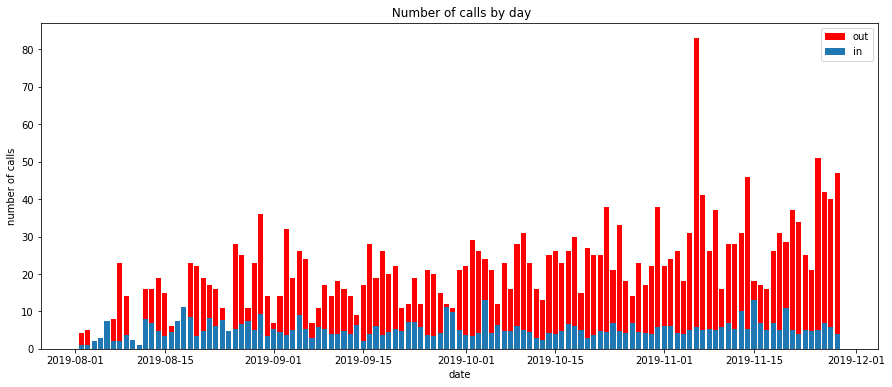

In [32]:
fig,data = plt.subplots()
data.bar(data_out['date'], data_out['calls_count'],color='red');
data.bar(data_in['date'], data_in['calls_count']);
data.set_title(' Number of calls by day');
data.set_xlabel('date');
data.set_ylabel('number of calls');
data.legend(['out','in']);
fig.set_figheight(6)
fig.set_figwidth(15)

The graph shows greater values for outgoing calls. A small number of incoming calls per day could be considered for values lower than 5 and for outgoing calls values lower than 10.

#### Study the share of internal and external calls for each day and describe the findings. Plot a histogram.


In [33]:
dataset['month'] = dataset['date'].dt.month

data_ext = dataset[dataset['internal']==False]
ext=data_ext.groupby(['month','date'],as_index=False)['internal'].count()

data_int = dataset[dataset['internal']==True]
inte=data_int.groupby(['month'],as_index=False)['internal'].count()

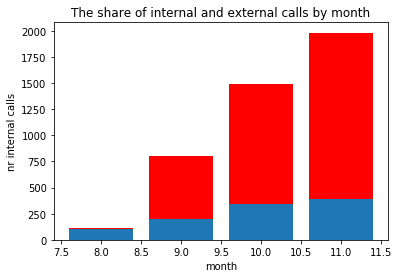

In [34]:
plt.bar(inte['month'], inte['internal'],color='red');
plt.bar(ext['month'], ext['internal']);
plt.title('The share of internal and external calls by month');
plt.xlabel('month');
plt.ylabel('nr internal calls');

Way more internal calls , the difference between external and internal calls are rising by month, external calls not exceeding 500.

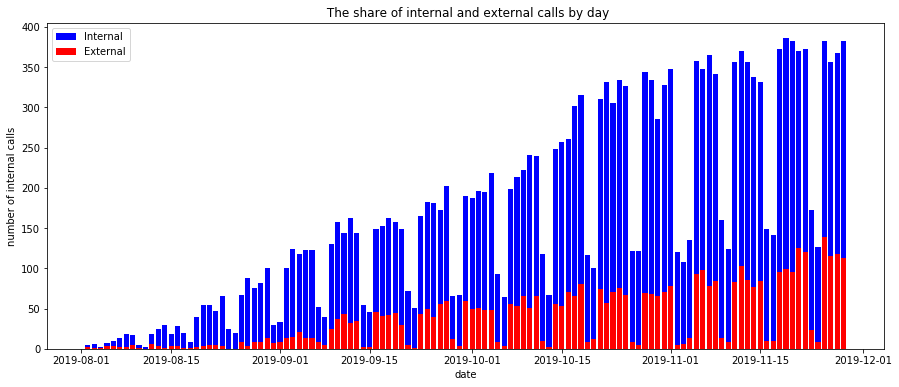

In [35]:
intern=data_int.groupby(['date'],as_index=False)['internal'].count()
extern=data_ext.groupby(['date'],as_index=False)['internal'].count()
fig,data=plt.subplots()
data.bar(extern['date'], extern['internal'],color='blue');
data.bar(intern['date'], intern['internal'],color='red');
data.set_title(' The share of internal and external calls by day');
data.set_xlabel('date');
data.set_ylabel('number of internal calls');
data.legend(['Internal','External'])
fig.set_figheight(6);
fig.set_figwidth(15);

For daily calls, we can see that values are rising for both internal and external calls, especially from monday to friday. The values on weekend are almost half the values from the rest of the week. As the values are still rising, for incoming calls ,  from monday to friday, we can say that values lower than 600 are low values and on weekend values lower than 200. For outgoing calls : 10 on weekend and 50 for the rest of the week. 

#### Study the call length for incoming calls for those with waiting time and without waiting time. Compare the results. Plot a histogram for each of them.

In [36]:
dataset[dataset['direction']=='in']['total_call_duration'].mean()

61.19179111486804

In [37]:
dataset[dataset['direction']=='in']['call_duration'].mean()

dataset['waiting_time'] = dataset['total_call_duration']-dataset['call_duration']
time = dataset.groupby(['date','operator_id','direction']).agg({'waiting_time' : 'mean'}).reset_index()


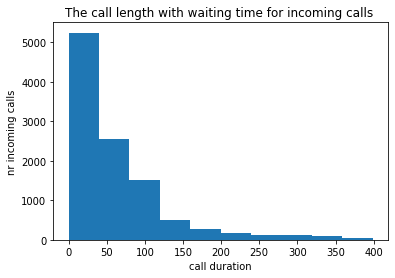

In [38]:
plt.hist(dataset[dataset['direction']=='in']['total_call_duration']);
plt.title('The call length with waiting time for incoming calls ');
plt.xlabel('call duration');
plt.ylabel('nr incoming calls');

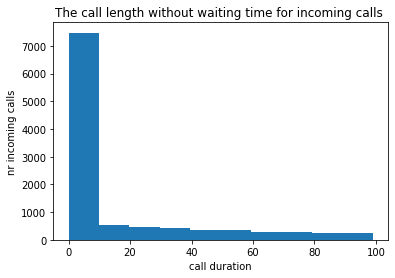

In [39]:
plt.hist(dataset[dataset['direction']=='in']['call_duration']);
plt.title('The call length without waiting time for incoming calls ');
plt.xlabel('call duration');
plt.ylabel('nr incoming calls');

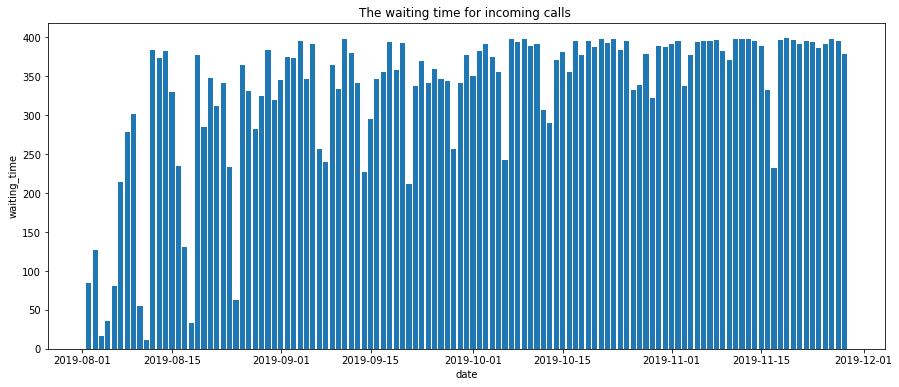

In [40]:
fig,graph = plt.subplots()
graph.bar(time['date'],time['waiting_time']);
graph.set_title('The waiting time for incoming calls ');
graph.set_xlabel('date');
graph.set_ylabel('waiting_time');
fig.set_figheight(6);
fig.set_figwidth(15);

From the graphs we can observe that the clients are waiting almost 300 minutes for incoming calls. 

#### Calculate the number of missing calls per day for each operator. Plot a histogram.


0.731020779865883


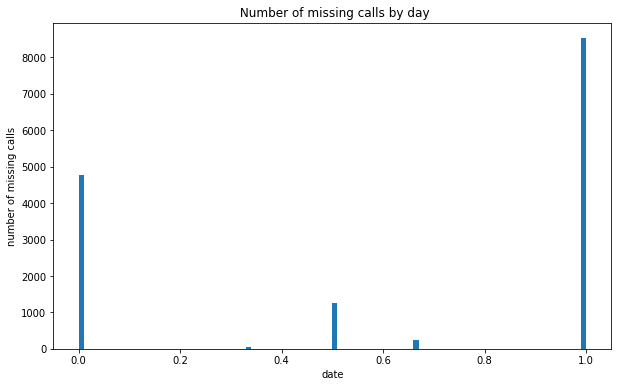

In [46]:
missing = dataset.groupby(['date','direction','operator_id'], as_index=False)['is_missed_call'].mean()
fig,mis=plt.subplots()
mis.hist( missing['is_missed_call'],bins=100);
mis.set_title(' Number of missing calls by day');
mis.set_xlabel('date');
mis.set_ylabel('number of missing calls');
fig.set_figheight(6);
fig.set_figwidth(10);
print(dataset['is_missed_call'].mean())

The graph is showing that most of the operators are missing usually 1 to no call per day . This means that an effective operator is not having a value more than 0.5 per day.

#### Determinate ineffective operators.

Based on the previous analysis, the ineffective operators are those with more than 1 missing incoming calls per day, has less than 10 outgoing calls per day and the waiting time for incoming calls is more than 300 minutes. 

In [42]:
inc1= missing[((missing['is_missed_call'] >= 1.0) &( missing['direction']=='in'))]['operator_id'].unique()
out1 =nr_call[((nr_call['direction']=='out')& (nr_call['calls_count'] < 10))]['operator_id'].unique()
wait = time[((time['direction']=='in')& (time['waiting_time'] > 300))]['operator_id'].unique()

list_1 =list(inc1)
list_2 = list(out1)
list_3 = list(wait)
print (set().union(list_1,list_2,list_3))
print ( 'The number of ineffective operators : ',len(set().union(list_1,list_2,list_3)))

{0, 919552, 919554, 882690, 899076, 882688, 897030, 937984, 937988, 954376, 899082, 954378, 954380, 958468, 958470, 958472, 958478, 923666, 935958, 888868, 938022, 915504, 964666, 901178, 948286, 948288, 913474, 952392, 944210, 905300, 929876, 903254, 944216, 944218, 944220, 905308, 944222, 929884, 938078, 942174, 933986, 944226, 915556, 962658, 915558, 944228, 964712, 960620, 933996, 964716, 934000, 944246, 928926, 903292, 925826, 925828, 960648, 952458, 952460, 952462, 903312, 952466, 952468, 903318, 915614, 960670, 960672, 960674, 927910, 927912, 927916, 950444, 958640, 907440, 899250, 907442, 917680, 917682, 934074, 934076, 909502, 899268, 895172, 958672, 934098, 884946, 932050, 905430, 921814, 921818, 925922, 930020, 907502, 919790, 919792, 907504, 919794, 893172, 932088, 905470, 905472, 905480, 891152, 891154, 954642, 891156, 891158, 946454, 891160, 954650, 891162, 891166, 895266, 891170, 934188, 973120, 905538, 905542, 883018, 952656, 917846, 962902, 919896, 962904, 917850, 9444

#### Test the hypotheses 

#### Incoming calls have a larger number of missing calls than outcoming calls ;

In [43]:
incoming_calls = dataset[dataset['direction']=='in'].groupby('user_id')['is_missed_call'].count()
outgoing_calls = dataset[dataset['direction']=='out'].groupby('user_id')['is_missed_call'].count()

alpha = 0.05
results = st.ttest_ind(incoming_calls, outgoing_calls)
print(incoming_calls.mean())
print(outgoing_calls.mean())
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


34.68078175895766
61.13574660633484
p-value:  3.36889869327546e-05
We reject the null hypothesis


H0 : 'There is no difference between the samples '<br>
H1 : 'There is a significant difference between the samples' <br>
The probability value shows that there is a significant difference between the incoming and outgoing calls, outgoing calls having larger number of missing values.

#### Users with A tariff plan have a longer waiting time for incoming calls than average ;

In [44]:
sample_1 = dataset.merge(clients, on='user_id')
a = sample_1[((sample_1['direction']=='in') & (sample_1['tariff_plan'] == 'A'))].groupby('user_id')['total_call_duration'].mean()
b = sample_1[((sample_1['direction']=='in')&(sample_1['tariff_plan']=='A'))].groupby('user_id')['call_duration'].mean()
c=a-b

d = sample_1[(sample_1['direction']=='in')].groupby('user_id')['total_call_duration'].mean()
e = sample_1[(sample_1['direction']=='in')].groupby('user_id')['call_duration'].mean()
f=d-e
print(c.mean())
print(f.mean())
alpha = 0.05
results = st.ttest_ind(c,f)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


37.61134185817323
36.13353348358662
p-value:  0.7877780060019433
We can't reject the null hypothesis


H0 : 'There is no difference between the samples '<br>
H1 : 'There is a significant difference between the samples' <br>
There is a difference between the sample, users with A tariff plan having a longer waiting time for incoming calls than average.

#### Users with C tariff plan have a smaller number of outgoing calls than users with B tariff plan ;

In [45]:
a = sample_1[((sample_1['direction']=='out') & (sample_1['tariff_plan'] == 'C'))].groupby('user_id')['total_call_duration'].mean()
b = sample_1[((sample_1['direction']=='out')&(sample_1['tariff_plan']=='C'))].groupby('user_id')['call_duration'].mean()
c=a-b

d = sample_1[((sample_1['direction']=='out') & (sample_1['tariff_plan'] == 'B'))].groupby('user_id')['total_call_duration'].mean()
e = sample_1[((sample_1['direction']=='out') & (sample_1['tariff_plan'] == 'B'))].groupby('user_id')['call_duration'].mean()
f=d-e
print(c.mean())
print(f.mean())
alpha = 0.05
results = st.ttest_ind(c,f)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


54.32801405024186
70.06531571700629
p-value:  0.024486434240766252
We reject the null hypothesis


H0 : 'There is no difference between the samples '<br>
H1 : 'There is a significant difference between the samples' <br>
There is no difference between the samples, users with C tariff having similar number of outgoing calls to users with B tariff plan.

In the process of finding the ineffective operators we found out some anomalies and duplicates.Also the tests showed that the tariffs doesn't influence the number of outgoing calls, the outgoing calls have a larger number of missing calls than incoming calls and that the tariff A have longer waiting time for incoming calls than average. The graphs showed that the number of missing calls by day for an ineffective operator is one,less than 10 outgoing calls per day and the waiting time for incoming calls is more than 200 minutes.